In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NOy1','NOy2','NOy3','year', 'month', 'day']]
Y1 = df['NO']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=8)

In [10]:
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=12,
                                      max_features='auto',
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=12, max_features='auto',
                          min_samples_leaf=4, n_estimators=1000)

In [11]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9969316770821915

Score on test data: -0.5855227173290027

Root Mean Squared Error: 40.19002697097164

Overall model accuracy: -0.5855227173290027


In [13]:
test=data.loc['207':'259']
X=test[['NOy1','NOy2','NOy3','year', 'month', 'day']]

X

,NOy1,NOy2,NOy3,year,month,day
207,125.535714,80.651429,100.627143,2019,12,29
208,109.870000,174.377143,98.832857,2020,1,5
209,84.832857,75.938571,101.944286,2020,1,12
210,117.140000,71.592857,94.412857,2020,1,19
211,34.865714,74.328571,49.015714,2020,1,26
212,47.905714,32.171429,74.012857,2020,2,2
213,65.595714,112.367143,153.021429,2020,2,9
214,73.142857,35.207143,50.672857,2020,2,16
215,68.825714,122.750000,34.234286,2020,2,23
216,86.743571,79.125714,38.925714,2020,3,1


In [14]:
predict=grad_boost.predict(X)

In [15]:
predict

array([123.66541156, 111.93767238,  52.90922502,  90.48536491,
        76.04639912,  44.36502716,  59.13496213,  47.41633741,
        70.97979395,  64.75597509,  43.10392357,  40.3544535 ,
        62.59080771,  69.60175578,  75.66657911,  36.27020271,
        39.12430217,  67.32695655,  69.01466002,  58.35564779,
        74.58227689,  61.3275564 ,  59.85285524,  14.47624539,
        18.23721614,  17.85569175,  39.91235595,  17.65095384,
        20.30947031,  13.32634151,  19.74055298,   6.61634751,
        10.64963203,  18.70860341,  22.5838916 ,  26.65972624,
        16.71172169,  14.16392921,  18.0562062 ,  67.36769166,
       141.21114025, 137.35061023, 129.50530228, 129.97599965,
       156.60217767, 148.81083939, 106.20139547, 135.0519295 ,
       139.22475189, 135.29113364, 149.39272954, 127.20540301,
       131.64508635])

In [16]:
dates=data.loc['207':'259','From Date']

In [17]:
X['From Date']=dates.values

In [18]:
X.columns

Index(['NOy1', 'NOy2', 'NOy3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [19]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [20]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [21]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [22]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

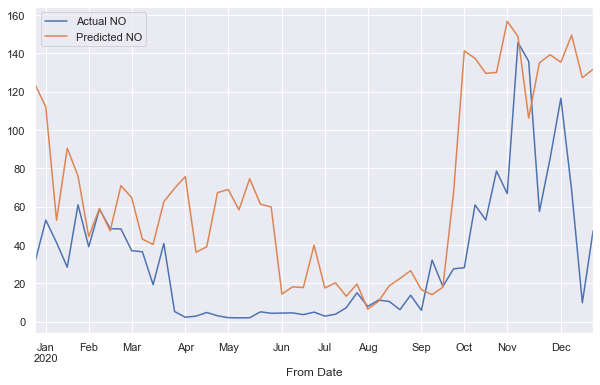

In [23]:
test['NO'].plot(legend=True, label='Actual NO', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO')

In [24]:
np.sqrt(mean_squared_error(test['NO'],X['pred']))

49.701344610914504

In [25]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 28.347331036283443
MSE: 1615.2382679274278
RMSE: 40.19002697097164
R-Squared: -0.5855227173290027


In [26]:
mae = metrics.mean_absolute_error(test['NO'],X['pred'])
mse = metrics.mean_squared_error(test['NO'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 38.05979430680382
MSE: 2470.2236561328805
RMSE: 49.701344610914504
R-Squared: -1.1446875558137997


In [27]:
import pickle
filename = 'NO_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [28]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-0.5855227173290027


# 3rd plot

In [29]:
testcase = pd.DataFrame()

In [30]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [31]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [32]:
testcase

,test,pred,Corrected
155,125.535714,125.941675,85.751648
156,109.870000,139.506795,99.316768
157,84.832857,35.958770,76.148796
158,117.140000,44.639179,84.829206
159,34.865714,68.806222,28.616195
160,47.905714,52.604338,12.414311
161,65.595714,106.204059,66.014032
162,73.142857,63.034910,103.224937
163,68.825714,69.710757,29.520730
164,86.743571,59.534786,99.724813


In [33]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [34]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.5748888691309261

In [35]:
test2020=pd.DataFrame()

In [36]:
test2020['test']=test['NO']
test2020['pred']=X['pred']

In [37]:
test2020.index=test.index

In [38]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

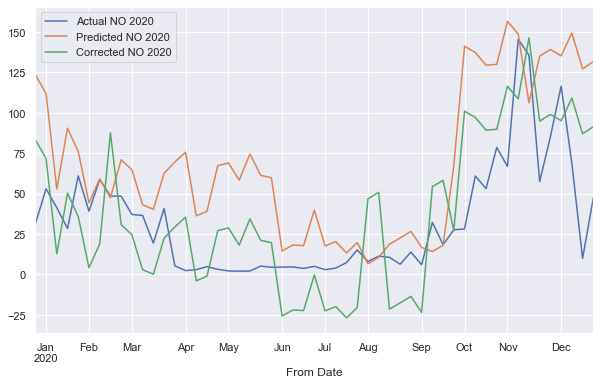

In [39]:
test2020['test'].plot(legend=True, label='Actual NO 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO 2020')

In [40]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5203803853519476